# 05 다시 살펴보는 머신러닝 주요개념
## 다루는 내용
* 분류와 회귀
    * 회귀 평가지표
* 분류 평가지표
    * 오차 행렬
        * 정확도, 정밀도, 재현율, F1 점수
    * 로그 손실
    * ROC, AUC
* 데이터 인코딩
    * 레이블 인코딩
    * 원-핫 인코딩
* 피처 스케일링
    * min-max 정규화
    * 표준화
* 교차 검증
    * K 폴드
    * 층화 K 폴드
* 주요 머신러닝 모델
    * 선형 회귀
    * 로지스틱 회귀
    * 결정 트리
    * 앙상블
    * 랜덤 포레스트
    * XGBoost
    * LightGBM
* 하이퍼파라미터 최적화
    * 그리드 서치
    * 랜덤 서치
    * 베이지안 최적화

## 5.1 분류와 회귀
* 타깃값이 범주형 데이터면 분류 문제
* 타깃값이 숫자형 데이터면 회귀 문제
### 5.1.1 분류
* 분류(classification)란?
    * 어떤 대상을 정해진 범주에 구분하는 작업
* 이진 분류(binary classification)
    * 타깃값이 두 개인 분류
* 다중 분류(multiclass classification)
    * 타깃값이 세 개 이상인 분류
### 5.1.2 회귀
* 독립 변수(independent variable)
    * 영향을 미치는 변수
* 종속 변수(dependent variable)
    * 영향을 받는 변수
* 회귀(regression)란?
    * 독립변수와 종속변수 간 관계를 모델링하는 방법
    * Y = $\theta_0$ + $\theta_1$x
* 다중선형회귀(multiple linear regression)
    * Y = $\theta_0$ + $\theta_1x_1$ + $\theta_2x_2$ + $\theta_3x_3$
* 회귀 모델의 성능을 측정하는 평가지표
|평가지표|수식|설명|
|--|--|--|
|MAE|${1 \over N} \sum_{i=1}^N\|y_i - \hat{y_i}\|$|평균 절대 오차(Mean Absolute Error)|
|MSE|${1 \over N} \sum_{i=1}^N(y_i - \hat{y_i})^2$|평균 제곱 오차(Mean Squared Error)|
|RMSE|$\sqrt{{1 \over N} \sum_{i=1}^N(y_i - \hat{y_i})^2}$|평균 제곱근 오차(Root Mean Squared Error)|
|MSLE|${1 \over N} \sum_{i=1}^N(log(y_i+1)-log(\hat{y_i}+1))^2$|Mean Squared Log Error|
|RMSLE|$\sqrt{{1 \over N} \sum_{i=1}^N(log(y_i+1)-log(\hat{y_i}+1))^2}$|Root Mean Squared Log Error|
|R$^2$|$ \hat{\sigma}^2 \over {\sigma}^2$|예측 타깃값의 분산/실제 타깃값의 분산, 1에 가까울 수록 성능이 좋음|

In [20]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

real = np.array([1,2,3,2,3,5,4,6,5,6,7,8,8]) # 실제값
preds = np.array([1,1,2,2,3,4,4,5,5,7,7,6,8]) # 예측값

MAE = mean_absolute_error(real, preds)
MSE = mean_squared_error(real, preds)
RMSE = np.sqrt(MSE)
RMSE2 = mean_squared_error(real, preds, squared=False) # RMSE
MSLE = mean_squared_log_error(real, preds)
RMSLE = np.sqrt(MSLE)
RMSLE2 = mean_squared_log_error(real, preds, squared=False) # RMSLE
R2 = r2_score(real, preds)

print(f'MAE:\t {MAE:.4f}')
print(f'MSE:\t {MSE:.4f}')
print(f'RMSE:\t {RMSE:.4f}')
print(f'RMSE2:\t {RMSE2:.4f}')
print(f'MSLE:\t {MSLE:.4f}')
print(f'RMSLE:\t {RMSLE:.4f}')
print(f'RMSLE2:\t {RMSLE2:.4f}')
print(f'R2:\t\t {R2:.4f}')

MAE:	 0.5385
MSE:	 0.6923
RMSE:	 0.8321
RMSE2:	 0.8321
MSLE:	 0.0296
RMSLE:	 0.1721
RMSLE2:	 0.1721
R2:		 0.8617


* 상관계수란?
    * 두 변수 사이의 상관관계 정도를 수치로 나타낸 값
    * 피어슨 상관계수가 많이 사용됨
    * -1~1 사이의 값을 가짐
    * ![corr](images/corr.PNG)

## 5.2 분류 평가지표
### 5.2.1 오차 행렬
* 오차 행렬(confusion matrix)
    * ![](images/confusion.PNG)
* 정확도(accuracy)
    * 실제값과 예측값의 일치 비율
    * 높은 정확도가 모델의 우수성을 담보하지 않음
    * 평가지표로 잘 사용하지 않음
* 정밀도(precision)
    * 음성을 양성으로 잘못 판단하면 문제가 발생하는 경우에 사용
    * ex) 스팸메일(양성 - 스팸메일, 음성 - 정상메일)
* 재현율(recall)
    * sensitivity, TPR(true positive rate)이라고도 함
    * 양성을 음성으로 잘못 판단하면 문제가 되는 경우에 사용
    * ex) 암 진단(양성 - 암, 음성 - 정상)
* F1 점수(F1 score)
    * 정밀도와 재현율을 조합한 평가지표
### 5.2.2 로그 손실
* 분류 문제에서 타깃값을 확률로 예측할 때 기본적으로 사용하는 평가 지표
* 값이 작을 수록 좋은 지표
* $logloss = -{{1}\over{N}}\sum_{i=1}^N(y_ilog(\hat{y_i})+(1-y_i)log(1-\hat{y_i}))$
### 5.2.3 ROC 곡선과 AUC
* ROC(Receiver Operating Characteristic) 곡선
    * TPR(참 양성 비율)에 대한 FPR(거짓 양성 비율) 곡선
    * sensitivity에 대한 1-specificity 곡선
    * TRP = recall = sensitivity
    * FPR = 1 - TNR = 1 - specificity
    * ![](images/roc.PNG)
* AUC(Area Under the Curve)
    * 곡선 아래 면적
    * 완벽 분류 : 1
    * 무작위 분류 : 0.5

## 5.3 데이터 인코딩
* 문자로 구성된 범주형 데이터는 숫자로 바꿔야 함
* 데이터 인코딩이란?
    * 범주형 데이터를 숫자로 바꾸는 작업
### 5.3.1 레이블 인코딩
* 레이블 인코딩(label encoding)
    * 범주형 데이터를 숫자로 일대일 매핑해주는 인코딩 방식
    * 사이킷런의 LabelEncoder 사용

In [25]:
from sklearn.preprocessing import LabelEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']
label_encoder = LabelEncoder()
fruits_label_encoded = label_encoder.fit_transform(fruits)
for f, l in zip(fruits, fruits_label_encoded):
    print(f, ' : ', l)

사과  :  3
블루베리  :  2
바나나  :  1
귤  :  0
블루베리  :  2
바나나  :  1
바나나  :  1
사과  :  3


### 5.3.2 원-핫 인코딩
* 원-핫 인코딩(one-hot encoding)
    * 여러 값 중 하나만 활성화 하는 인코딩
    * 레이블 인코딩의 데이터를 증감이 있는 데이터로 판단하는 문제 해결
    * 사이킷런의 OneHotEncoder 사용(범주형 데이터 -> label encoding -> onehot encoding)
    * pandas의 get_dummies() 함수를 사용하면 label encoding없이 onehot encoding 가능

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

fruits_label_encoded = label_encoder.fit_transform(fruits)
fruits_onehot_encoded = onehot_encoder.fit_transform(fruits_label_encoded.reshape(-1, 1))
for f, o in zip(fruits, fruits_onehot_encoded.toarray()):
    print(f, o)

사과 [0. 0. 0. 1.]
블루베리 [0. 0. 1. 0.]
바나나 [0. 1. 0. 0.]
귤 [1. 0. 0. 0.]
블루베리 [0. 0. 1. 0.]
바나나 [0. 1. 0. 0.]
바나나 [0. 1. 0. 0.]
사과 [0. 0. 0. 1.]


## 5.4 피처 스케일링
* 피처 스케일링(feature scaling)이란?
    * 서로 다른 피처 값의 범위가 일치하도록 조정하는 작업
    * 모델에 따라 값의 범위가 피처마다 다르면 훈련이 제대로 안될수 있음
### 5.4.1 min-max 정규화
* min-max 정규화(min-max normalization)
    * 피처 값의 범위를 0~1로 조정하는 기법
    * $x_{scaled} = {{x-x_{min}} \over {x_{max}-x_{min}}}$
    * 이상치가 너무 크거나 작을 때는 좋지 않은 결과가 나타남
    * 사이킷런의 MinMaxScaler 사용

In [36]:
import pandas as pd

height_weight_dict = {'키': [1.7, 1.5, 1.8], '몸무게': [75, 55, 60]}
df = pd.DataFrame(height_weight_dict, index=['광일', '혜성', '덕수'])
df

,키,몸무게
광일,1.7,75
혜성,1.5,55
덕수,1.8,60


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled)

[[0.66666667 1.        ]
 [0.         0.        ]
 [1.         0.25      ]]


### 5.4.2 표준화
* 표준화(standardization)란?
    * 평균이 0, 분산이 1이 되도록 피처 값을 조정하는 기법
    * 상한과 하한이 없음
    * $x_{scaled} = {{x-\hat{x}}\over{\sigma}}$
    * 사이킷런의 StandardScaler 사용

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled)

[[ 0.26726124  1.37281295]
 [-1.33630621 -0.98058068]
 [ 1.06904497 -0.39223227]]


## 5.5 교차 검증
* 성능 검증의 필요성
    * 모델의 과대적합 검증
    * 모델 성능 검증
### 5.5.1 K 폴드 교차 검증
* K 폴드 교차 검증(K-Fold Cross Validation)
    * 훈련 데이터를 K개의 그룹으로 나눈후 하나를 검증 데이터 사용
    * 위 작업을 반복
    * ![](images/k-fold.PNG)
    * 사이킷런의 KFold 사용

In [40]:
import numpy as np
from sklearn.model_selection import KFold

data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
folds = KFold(n_splits=5, shuffle=False) # data를 5 개의 폴드로 나눔, 섞지 않음

for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터 : {data[train_idx]}, 검증 데이터 : {data[valid_idx]}')

훈련 데이터 : [2 3 4 5 6 7 8 9], 검증 데이터 : [0 1]
훈련 데이터 : [0 1 4 5 6 7 8 9], 검증 데이터 : [2 3]
훈련 데이터 : [0 1 2 3 6 7 8 9], 검증 데이터 : [4 5]
훈련 데이터 : [0 1 2 3 4 5 8 9], 검증 데이터 : [6 7]
훈련 데이터 : [0 1 2 3 4 5 6 7], 검증 데이터 : [8 9]


In [41]:
import numpy as np
from sklearn.model_selection import KFold

data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
folds = KFold(n_splits=5, shuffle=True) # 데이터가 편향되게 분포되어 있을 경우 섞어주는게 좋음

for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터 : {data[train_idx]}, 검증 데이터 : {data[valid_idx]}')

훈련 데이터 : [0 1 2 3 4 5 8 9], 검증 데이터 : [6 7]
훈련 데이터 : [1 2 3 4 6 7 8 9], 검증 데이터 : [0 5]
훈련 데이터 : [0 1 3 4 5 6 7 9], 검증 데이터 : [2 8]
훈련 데이터 : [0 2 3 4 5 6 7 8], 검증 데이터 : [1 9]
훈련 데이터 : [0 1 2 5 6 7 8 9], 검증 데이터 : [3 4]


### 5.5.2 층화 K 폴드 교차 검증
* 층화 K 폴드 교차 검증(Stratified K-Fold Cross Validation)
    * 타깃값이 골고루 분포되게 폴드를 나누는 K 폴드 교차 검증 방법
    * ![](images/stratified.PNG)
    * 사이킷런의 StratifiedKFold 사용

In [48]:
from sklearn.model_selection import StratifiedKFold

X = np.array(range(50))
y = np.array(['스팸']*5 + ['일반']*45)

folds = StratifiedKFold(n_splits=5)

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print(f'Fold {idx+1} 검증 데이터 타깃값:')
    print(y[valid_idx])

Fold 1 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반']
Fold 2 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반']
Fold 3 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반']
Fold 4 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반']
Fold 5 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반']


## 5.6 주요 머신러닝 모델
### 5.6.1 선형 회귀 모델
* 선형 회귀(Linear Regression) 모델
    * 선형 회귀식을 활용한 모델

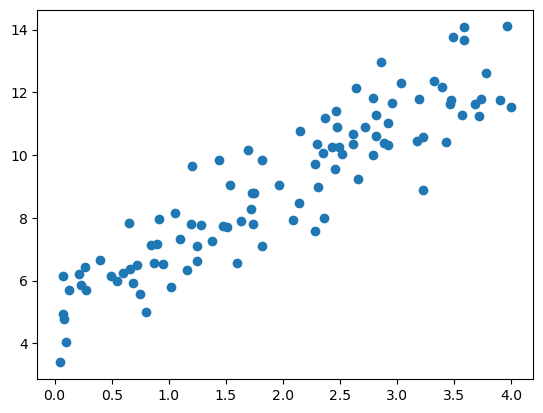

In [52]:
# 데이터 생성
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

w0 = 5
w1 = 2
noise = np.random.randn(100, 1) # 표준정규본포, shape(100,1)

x = 4 * np.random.rand(100, 1) # 균등분포, shape(100,1)
y = w1*x + w0 + noise

plt.scatter(x, y)

In [54]:
# 모델 훈련
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(x, y)

print('w0 : ', linear_reg_model.intercept_) # 실제 w0 = 5
print('w1 : ', linear_reg_model.coef_) # 실제 w1 = 2

w0 :  [5.09772262]
w1 :  [[1.9808382]]


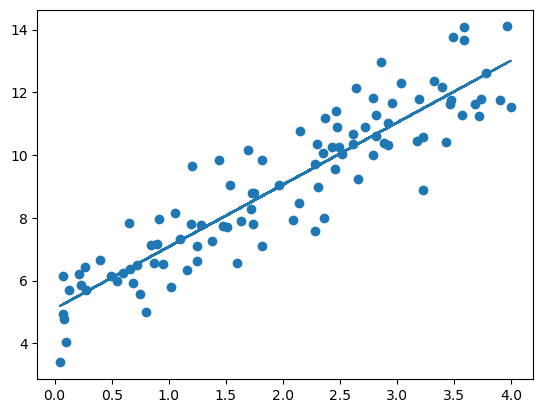

In [55]:
# 회귀선 확인
y_pred = linear_reg_model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred)

### 5.6.2 로지스틱 회귀 모델
* 로지스틱 회귀(Logistic Regression)
    * 선형 회귀 방식을 응용해 분류에 적용한 모델
    * 시그모이드 함수(sigmoid function)를 활용해 타깃값에 포함될 확률을 예측
    * 사이킷런의 LogisticRegression 사용
    * predict() 함수로 타깃값 예측
        * 시그모이드 함수의 결과로 나온 확률을 0.5 기준으로 분류
    * predict_proba() 함수로 타깃값일 확률 예측
        * 시그모이드 함수의 결과로 나온 확률

### 5.6.3 결정 트리
* 결정트리(decision tree)
    * 조건을 기반으로 데이터를 두 범주로 나누고 이 작업을 반복
    * 의사결정 나무라고도 함
    * 분류와 회귀 문제에 모두 사용 가능
    * ![](images/decision.PNG)
* 결정트리 분할 방식
    * 불순도를 최소화하는 방향으로 분할
* 불손도(impurity)란?
    * 한 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 나타내는 정도
* 불손도를 측정하는 지표
    * 엔트로피(entropy)
        * 불확실한 정도
        * (1-엔트로피) = 정보 이득(information gain)
        * 정보 이득이 최대화 하는 방향으로 노드를 분할
    * 지니 불순도(gini impurity)
        * 지니 불순도 값이 클수록 불순도가 높음
        * 지니 불순도가 낮아지는 방향으로 노드를 분할
* 결정트리 구현
    * 사이킷런의 DecisionTreeClassifier, DecisionTreeRegressor 사용
    * DecisionTreeClassifier 주요 파라미터
        * criterion
            * 분할 시 사용할 불순도 측정 지표
            * gini or entropy
        * max_depth
            * 트리의 최대 깊이
        * min_samples_split
            * 노드 분할을 위한 최소 데이터 개수
        * min_samples_leaf
            * 말단 노드가 되기 위한 최소 데이터 개수
        * max_features
            * 분할에 사용할 피처 개수
        * max_depth, min_samples_split, min_samples_leaf는 과대적합을 제어하는 파라미터

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data['data'],
    cancer_data['target'],
    stratify=cancer_data['target'],
    test_size=0.4,
    random_state=42
)
decisiontree = DecisionTreeClassifier(random_state=42)
decisiontree.fit(X_train, y_train)

accuracy = decisiontree.score(X_test, y_test)

print(f'정확도 : {accuracy:.3f}')

정확도 : 0.930


### 5.6.4 앙상블 학습
* 앙상블 학습(ensemble learning)
    * 다양한 모델이 내린 예측 결과를 결합하는 방법
    * 보팅, 배깅, 부스팅 유형이 있음
* 보팅(voting)
    * 서로 다른 모델로 예측한 결과를 종합해 최정 결과 결정
    * 하드 보팅
        * 최빈값을 기준으로 최종 예측값 결정
    * 소프트 보팅
        * 예측 확률들의 평균을 최종 예측 확률로 결정
* 배깅(bagging)
    * 개별 모델로 예측한 결과를 결합해 최종 예측을 정하는 기법
    * 개별 모델이 서로 다른 샘플링 데이터를 활용
    * ex> 랜덤 포레스트
* 보팅과 배깅 비교
    * ![](images/voting_bagging.PNG)
* 부스팅(boosting)
    * 모델간 협력이 이루어짐
    * 이전 모델이 잘못 예측한 데이터에 가중치를 부여
    * 이전 모델이 잘못 예측한 데이터에 더 집중해 훈련
    * ex> XGBoost, LightGBM
    * ![](images/boosting.PNG)

### 5.6.5 랜덤 포레스트
* 랜덤 포레스트(random forest)
    * 결정 트리를 배깅 방식으로 결합한 모델
    * 분류와 회귀 문제에 모두 적용 가능
    * 사이킷런의 RandomForestClassifier, RandomForestRegressor 사용
    * RandomForestClassifier의 주요 파라미터
        * n_estimators
            * 트리 개수
        * criterion
            * 분할 시 사용한 불순도 측정 지표
        * max_depth
            * 트리의 최대 깊이
        * min_samples_split
            * 노드 분할을 위한 최소 데이터 개수
        * min_samples_leaf
            * 말단 노드가 되기 위한 최소 데이터 개수
        * max_features
            * 분할에 사용할 피처 개수

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data['data'],
    cancer_data['target'],
    stratify=cancer_data['target'],
    test_size=0.4,
    random_state=42
)
randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, y_train)

accuracy = randomforest.score(X_test, y_test)

print(f'accuracy : {accuracy:.3f}')

accuracy : 0.939


### 5.6.6 XGBoost
* XGBoost(extreme gradient boosting)
    * 트리 기반 부스팅 알고리즘
    * 결정 트리를 직렬로 배치
    * 이전 트리가 예측한 값을 다음 트리가 활용
* 파이썬 래퍼 XGBoost
    * c와 c++로 작성된 라이브러리를 파이썬으로 래핑함

### 5.6.7 LightGBM
* LightGBM
    * 마이크로소프트에서 개발
    * 훈련속도가 XGBoost보다 빠름
    * 말단 노드 중심으로 예측 오류를 최소화하게끔 분할
    * 과대적합을 방지하기 위해 하이퍼파라미터를 조정해 줘야 함
    * ![](images/xg_light.png)
* XGBoost, LightGBM 특징
    * 피처 스케일링이 필요 없음
    * 레이블 인코딩 사용
    * 결측값을 알아서 처리

## 5.7 하이퍼파리미터 최적화
### 5.7.1 그리드 서치

### 5.7.2 랜덤 서치

### 5.7.3 베이지안 최적화

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np